# Classifying CIFAR-10 with Data Augmentation Using CNNs

In this lab, I want to explore how data augmentation can help improve the performance of our CNN model for classifying images in the CIFAR-10 dataset. The first phase of our project is our standard procedure:

1. Load the data
2. Build the model
3. Train the model
4. Evaluate the model

In Phase 2, we will explore how data augmentation can help us train our models on a "larger" training dataset without explicitly creating additional data. The core idea of data augmentation is as follows: imagine a picture of dog. Now suppose the dog in the picture is shifted to the left by a few pixels. Is it still a dog? Of course! Suppose we flip it horizontally. How about now?

By supplementing our training set with such samples, we allow our model to learn better without the need for additional unique training data.

Without further ado, let's start!

## Load the Data

Luckily for us, the CIFAR-10 dataset comes pre-packaged with TensorFlow.

In [1]:
import tensorflow.keras.datasets.cifar10 as cifar10
from sklearn.model_selection import train_test_split

(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0

# NOTE: we must NOT use the test data as validation data.
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


X_train: (40000, 32, 32, 3)
y_train: (40000, 1)


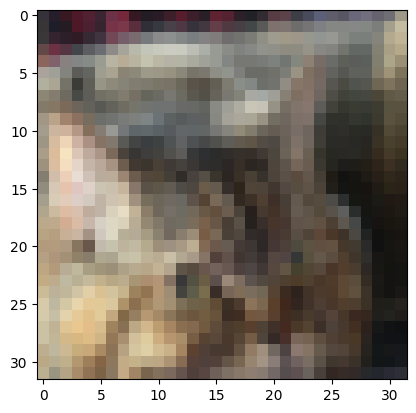

In [2]:
# Let's see the shape of our data and a sample
import matplotlib.pyplot as plt
import numpy as np

print(f"X_train: {X_train.shape}")
print(f"y_train: {y_train.shape}")

num = np.random.choice(len(X_train))
plt.imshow(X_train[num])

In [3]:
# Note that our y_train has an extra unnecessary dimension. We'd like to get rid of it.

y_train, y_valid, y_test = y_train.flatten(), y_valid.flatten(), y_test.flatten()

K = len(set(y_train))
print(f"Number of distinct classes: {K}")

Number of distinct classes: 10


## Build and Train the Models

Here, we'll run another mini experiment - the effectiveness of having a `BatchNormalization` layer in our model. In a previous lab, we saw that sometimes using a dropout layer can be helpful to prevent the model from overfitting to the training data, even though it came at the cost of reduced accuracy. Let's see if `BatchNormalization` can give us all that we want and more.

In [16]:
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, MaxPooling2D, BatchNormalization, Dropout
from tensorflow.keras.models import Model

# with batch normalization

## the feature transformer body
i = Input(shape=X_train[0].shape)

x = Conv2D(32, (3,3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3,3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)

x = Conv2D(64, (3,3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3,3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)

x = Conv2D(128, (3,3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3,3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)

x = Flatten()(x)

## the classification feedforward network
x = Dropout(0.2)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model_bn = Model(i,x)

# No batchnormalization
## the feature transformer body
i = Input(shape=X_train[0].shape)

x = Conv2D(32, (3,3), activation='relu', padding='same')(i)
#x = BatchNormalization()(x)
x = Conv2D(32, (3,3), activation='relu', padding='same')(x)
#x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)

x = Conv2D(64, (3,3), activation='relu', padding='same')(x)
#x = BatchNormalization()(x)
x = Conv2D(64, (3,3), activation='relu', padding='same')(x)
#x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)

x = Conv2D(128, (3,3), activation='relu', padding='same')(x)
#x = BatchNormalization()(x)
x = Conv2D(128, (3,3), activation='relu', padding='same')(x)
#x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)

x = Flatten()(x)

## the classification feedforward network
x = Dropout(0.2)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model_no_bn = Model(i,x)

In [17]:
model_bn.compile(optimizer='adam',
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])

model_no_bn.compile(optimizer='adam',
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])

In [18]:
# train the model
r_bn = model_bn.fit(X_train, y_train,
                    validation_data=(X_valid, y_valid),
                    epochs=50)

Epoch 1/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.4305 - loss: 1.8239 - val_accuracy: 0.6422 - val_loss: 1.0042
Epoch 2/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6762 - loss: 0.9220 - val_accuracy: 0.7160 - val_loss: 0.8312
Epoch 3/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7454 - loss: 0.7332 - val_accuracy: 0.6624 - val_loss: 1.0073
Epoch 4/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.7865 - loss: 0.6152 - val_accuracy: 0.7477 - val_loss: 0.7437
Epoch 5/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.8183 - loss: 0.5172 - val_accuracy: 0.7487 - val_loss: 0.7771
Epoch 6/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.8494 - loss: 0.4370 - val_accuracy: 0.7764 - val_loss: 0.7368
Epoch 7/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.8664 - loss: 0.3742 - val_accuracy: 0.7727 - val_loss: 0.7280
Epoch 8/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.8921 - loss: 0.3096

In [19]:
model_bn.save('model_bn.keras')

In [20]:
r_no_bn = model_no_bn.fit(X_train, y_train,
                    validation_data=(X_valid, y_valid),
                    epochs=50)

Epoch 1/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.3044 - loss: 1.8369 - val_accuracy: 0.5553 - val_loss: 1.2325
Epoch 2/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.5739 - loss: 1.1775 - val_accuracy: 0.6424 - val_loss: 0.9965
Epoch 3/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.6635 - loss: 0.9486 - val_accuracy: 0.6791 - val_loss: 0.9288
Epoch 4/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7183 - loss: 0.8033 - val_accuracy: 0.7258 - val_loss: 0.7860
Epoch 5/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7555 - loss: 0.6884 - val_accuracy: 0.7385 - val_loss: 0.7621
Epoch 6/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7870 - loss: 0.5982 - val_accuracy: 0.7493 - val_loss: 0.7281
Epoch 7/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.8085 - loss: 0.5376 - val_accuracy: 0.7441 - val_loss: 0.7546
Epoch 8/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.8280 - loss: 0.4865 -

In [21]:
model_no_bn.save('model_no_bn.keras')

Let's now plot the errors and accuracies of our models.

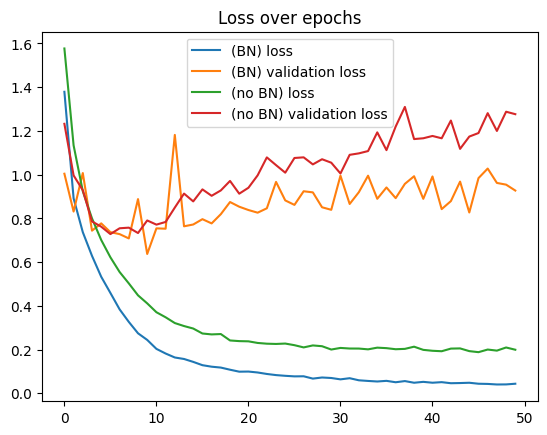

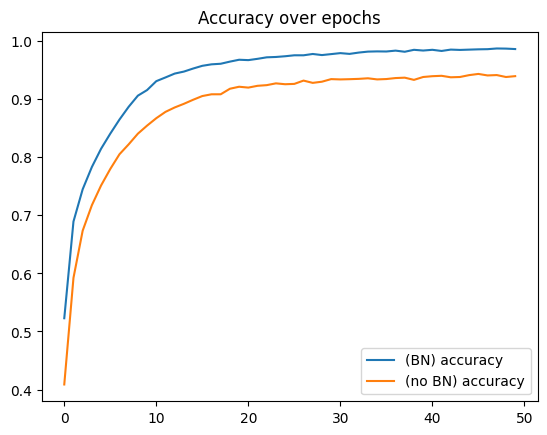

In [22]:
from tensorflow.keras.models import load_model


plt.plot(r_bn.history['loss'], label='(BN) loss')
plt.plot(r_bn.history['val_loss'], label='(BN) validation loss')
plt.plot(r_no_bn.history['loss'], label='(no BN) loss')
plt.plot(r_no_bn.history['val_loss'], label='(no BN) validation loss')
plt.legend()
plt.title("Loss over epochs")
plt.show()

plt.plot(r_bn.history['accuracy'], label='(BN) accuracy')
plt.plot(r_no_bn.history['accuracy'], label='(no BN) accuracy')
plt.legend()
plt.title("Accuracy over epochs")
plt.show()

From the plots, it is evident that the batch normalization model generalizes better with lesser overfitting, and also results in higher accuracy.

Next, let's evaluate the models.

## Evaluate the Models

In [27]:
from sklearn.metrics import classification_report

model_bn.evaluate(X_test, y_test)
# A more thorough report
y_bn_pred = np.argmax(model_bn.predict(X_test), axis=1)
print("Model (BN):\n", classification_report(y_test, y_bn_pred))

model_no_bn.evaluate(X_test, y_test)
y_no_bn_pred = np.argmax(model_no_bn.predict(X_test), axis=1)
print("Model (no BN):\n", classification_report(y_test, y_no_bn_pred))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8371 - loss: 0.9440
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Model (BN):
               precision    recall  f1-score   support

           0       0.82      0.89      0.85      1000
           1       0.93      0.91      0.92      1000
           2       0.78      0.74      0.76      1000
           3       0.69      0.69      0.69      1000
           4       0.81      0.81      0.81      1000
           5       0.75      0.79      0.77      1000
           6       0.87      0.86      0.87      1000
           7       0.91      0.82      0.87      1000
           8       0.90      0.92      0.91      1000
           9       0.90      0.91      0.90      1000

    accuracy                           0.83     10000
   macro avg       0.83      0.83      0.83     10000
weighted avg       0.83      0.83      0.83     10000

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7439 - loss: 1.3513
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/s

## Using Data Augmentation

Let's now try to improve the performance of our model (with batch normalization) through data augmentation.

As mentioned before, data augmentation involves increasing the size of our training dataset by also using translated and flipped data points. We would like to do this in a way that does not drastically increase our training time. Let's see how one might do that.

But first, we must initialize the model again for the purpose of this experiment. Ideally, we'd use data augmentation to fine-tune our model beyond it's initial training, but in this experiment, we want to see how data augmentation compares to a model fitting process without it.

In [28]:
# copied from before

## the feature transformer body
i = Input(shape=X_train[0].shape)

x = Conv2D(32, (3,3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3,3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)

x = Conv2D(64, (3,3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3,3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)

x = Conv2D(128, (3,3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3,3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)

x = Flatten()(x)

## the classification feedforward network
x = Dropout(0.2)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i,x)

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [31]:
# Data augmentation
import tensorflow as tf

batch_size = 32
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True)

train_generator = data_generator.flow(X_train, y_train, batch_size)
steps_per_epoch = X_train.shape[0] // batch_size

r = model.fit(train_generator,
              validation_data=(X_valid, y_valid),
              steps_per_epoch=steps_per_epoch,
              epochs=50)

Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 39s 24ms/step - accuracy: 0.3948 - loss: 1.9341 - val_accuracy: 0.5718 - val_loss: 1.2110
Epoch 2/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 28s 23ms/step - accuracy: 0.6156 - loss: 1.0941 - val_accuracy: 0.5962 - val_loss: 1.2348
Epoch 3/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 29s 23ms/step - accuracy: 0.6863 - loss: 0.9087 - val_accuracy: 0.7183 - val_loss: 0.8181
Epoch 4/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 28s 22ms/step - accuracy: 0.7128 - loss: 0.8310 - val_accuracy: 0.7628 - val_loss: 0.6920
Epoch 5/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 28s 22ms/step - accuracy: 0.7436 - loss: 0.7480 - val_accuracy: 0.7311 - val_loss: 0.9032
Epoch 6/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 29s 23ms/step - accuracy: 0.7580 - loss: 0.7077 - val_accuracy: 0.7653 - val_loss: 0.6826
Epoch 7/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 28s 22ms/step - accuracy: 0.7825 - loss: 0.6421 - val_accuracy: 0.7630 - val_loss: 0.7137
Epoch 8/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 28s 22ms/step - accuracy: 0.7914 - loss: 0.60

As always, let's plot the loss and accuracy curves. We'll also plot the curves for the non-data augmentation model to better visualize the comparison.

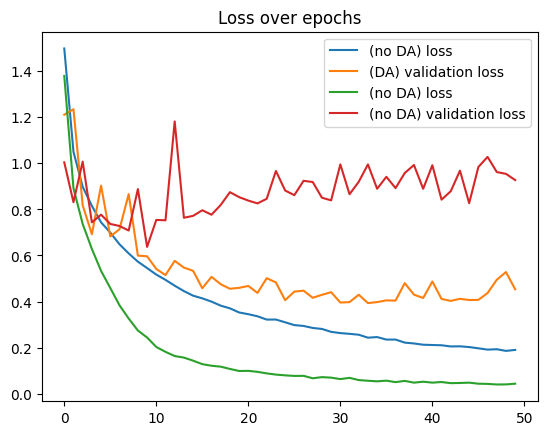

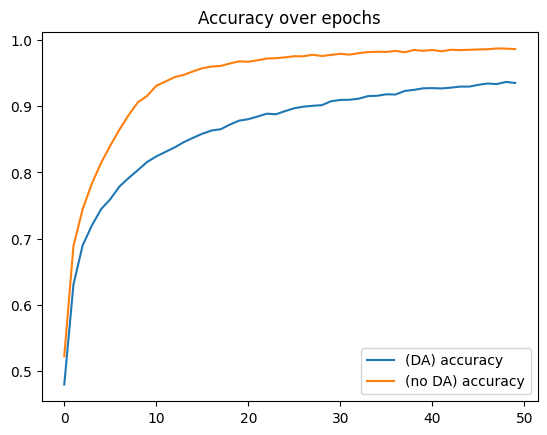

In [32]:
plt.plot(r.history['loss'], label='(no DA) loss')
plt.plot(r.history['val_loss'], label='(DA) validation loss')
plt.plot(r_bn.history['loss'], label='(no DA) loss')
plt.plot(r_bn.history['val_loss'], label='(no DA) validation loss')
plt.legend()
plt.title("Loss over epochs")
plt.show()

plt.plot(r.history['accuracy'], label='(DA) accuracy')
plt.plot(r_bn.history['accuracy'], label='(no DA) accuracy')
plt.legend()
plt.title("Accuracy over epochs")
plt.show()

The data augmented model performs significantly better than the standard model, in both generalization and accuracy. Let's evaluate the model more thoroughly.

## Evaluating the Data Augmented Model

In [34]:
model_bn.evaluate(X_test, y_test)
y_nda_pred = np.argmax(model_bn.predict(X_test), axis=1)
print("Model (No Data Augmentation):\n", classification_report(y_test, y_nda_pred))

model.evaluate(X_test, y_test)
y_da_pred = np.argmax(model.predict(X_test), axis=1)
print("Model (With Data Augmentation):\n", classification_report(y_test, y_da_pred))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8371 - loss: 0.9440
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Model (No Data Augmentation):
               precision    recall  f1-score   support

           0       0.82      0.89      0.85      1000
           1       0.93      0.91      0.92      1000
           2       0.78      0.74      0.76      1000
           3       0.69      0.69      0.69      1000
           4       0.81      0.81      0.81      1000
           5       0.75      0.79      0.77      1000
           6       0.87      0.86      0.87      1000
           7       0.91      0.82      0.87      1000
           8       0.90      0.92      0.91      1000
           9       0.90      0.91      0.90      1000

    accuracy                           0.83     10000
   macro avg       0.83      0.83      0.83     10000
weighted avg       0.83      0.83      0.83     10000

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8593 - loss: 0.4947
313/313 ━━━━━━━━━━━

Let's also plot the confusion matrix for our data augmented model to understand which pairs of classes our model confuses the most.

Text(0.5, 23.52222222222222, 'Predicted labels')

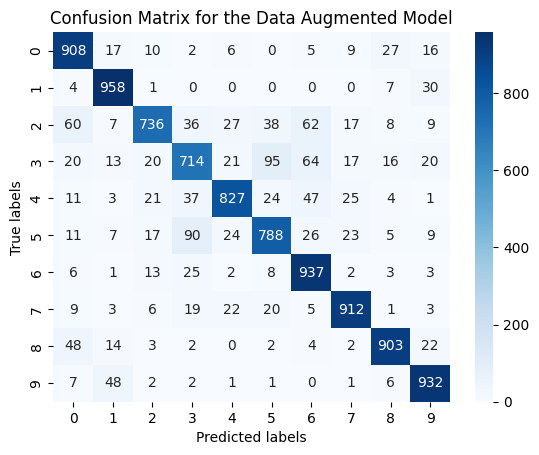

In [39]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_da_pred)

sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.title("Confusion Matrix for the Data Augmented Model")
plt.ylabel("True labels")
plt.xlabel("Predicted labels")

In [42]:
# For our reference:
labels = {
    0: "airplane",
    1: "automobile",
    2: "bird",
    3: "cat",
    4: "deer",
    5: "dog",
    6: "frog",
    7: "horse",
    8: "ship",
    9: "truck"
}

Let's see some of the misclassified images and find out if our own brains can classify better than what our CNN just did.

Text(0.5, 1.0, 'True Label: horse, Predicted Label: dog')

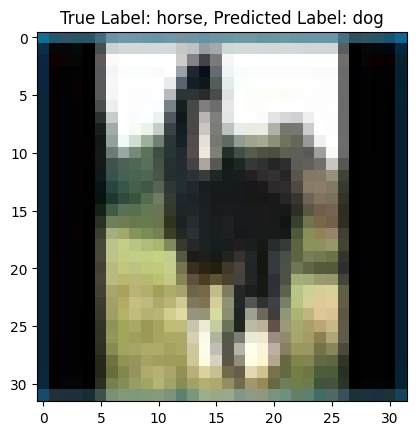

In [45]:
misclassified_idx = np.where(y_da_pred != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(X_test[i])
plt.title(f"True Label: {labels[y_test[i]]}, Predicted Label: {labels[y_da_pred[i]]}")

Before we conclude, let's glance at our model structure to better visualize what happens:

In [46]:
model.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_24 (Conv2D)              │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_28 (Conv2D)              │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_17          │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1024)           │     2,098,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │        10,250 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,189,888 (27.43 MB)

 Trainable params: 2,396,330 (9.14 MB)

 Non-trainable params: 896 (3.50 KB)

 Optimizer params: 4,792,662 (18.28 MB)

## Conclusion

In this experiment, we trained CNNs on the CIFAR-10 dataset and found that batch normalization and data augmentation improved classification results. Data augmentation, in particular, boosted validation accuracy and helped the model generalize better, reaching over 86% test accuracy. The final evaluation showed stronger precision, recall, and fewer misclassifications compared to models without augmentation.